For Xinhong

In [16]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os

In [31]:
# import function file
%run functions.ipynb

In [18]:
# select the path of the folder where the images are stored

#fol_path = "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D"



In [271]:
df_green,df_red=prewitt_method1_BG(fol_path)
df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
print("Datapoints before removing the outliers : " ,len(df_bg))
df_bg.to_csv(os.path.join(fol_path,'ParticleMeasurements-WithBGCorrection'+'.csv')) # write to csv before removing the outliers
df_bg=outliers(df_bg)

print("Datapoints after removing the outliers: " ,len(df_bg))

Datapoints before removing the outliers :  708
Datapoints after removing the outliers:  640


In [273]:
df_green,df_red=prewitt_method1_noBG(fol_path)
df_No_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
df_No_bg['intensity_ratio'] = df_No_bg['mean_intensity_green']/df_No_bg['mean_intensity_red']
print("Datapoints before removing the outliers : " ,len(df_No_bg))
df_No_bg.to_csv(os.path.join(fol_path,'ParticleMeasurements-WithOut_BGCorrection'+'.csv')) # write to csv before removing the outliers
df_No_bg=outliers(df_No_bg)
print("Datapoints after removing the outliers: " ,len(df_No_bg))

Datapoints before removing the outliers :  708
Datapoints after removing the outliers:  643


In [274]:
#plots
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})


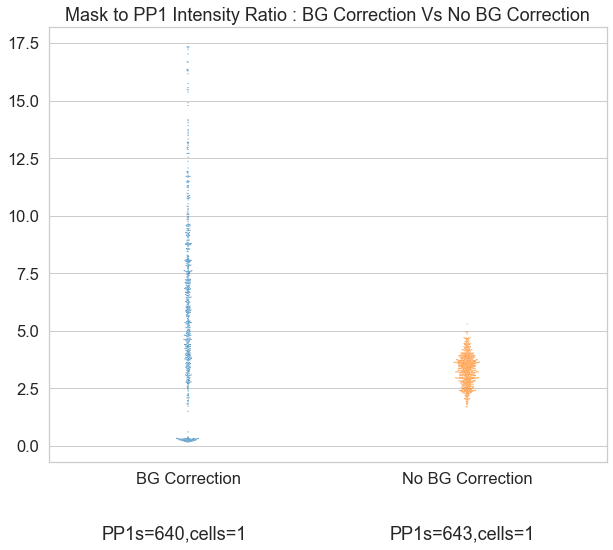

In [277]:
#plot : BG correction Vs no BG correction
df=pd.DataFrame(data=(df_bg['intensity_ratio'],df_No_bg['intensity_ratio'])).transpose()
df.columns=['BG Correction','No BG Correction']
title="Mask to PP1 Intensity Ratio : BG Correction Vs No BG Correction"
cells=1
plt.figure(figsize=(10,8))
sns_plot = sns.swarmplot(s=1,data=df).set_title(title)
plt.figtext(0.3, 0, 'PP1s=%s,cells=%s'%(len(df_bg),cells), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'PP1s=%s,cells=%s'%(len(df_No_bg),cells), horizontalalignment='center',verticalalignment='center')

name_of_file="Mask_to_PP1_BG_vs_No_BG_mean_intensity.png"
#graph_path=os.path.join(fol_path,"graphs" ,name_of_file)
#sns_plot.figure.savefig(graph_path, bbox_inches="tight",dpi=300)

plt.show()


In [29]:
fol_path = "AMovie/Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry03_R3D_D3D"

In [33]:
# Asifa movies
df_green,df_red=prewitt_method2_BG(fol_path)
df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
print("Datapoints before removing the outliers : " ,len(df_bg))
df_bg.to_csv(os.path.join(fol_path,'ParticleMeasurements-WithBGCorrection'+'.csv')) # write to csv before removing the outliers
df_bg=outliers(df_bg)

print("Datapoints after removing the outliers: " ,len(df_bg))

Datapoints before removing the outliers :  460
Datapoints after removing the outliers:  323


In [ ]:
df_green,df_red=prewitt_method2_noBG(fol_path)
df_No_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
df_No_bg['intensity_ratio'] = df_No_bg['mean_intensity_green']/df_No_bg['mean_intensity_red']
print("Datapoints before removing the outliers : " ,len(df_No_bg))
df_No_bg.to_csv(os.path.join(fol_path,'ParticleMeasurements-WithOut_BGCorrection'+'.csv')) # write to csv before removing the outliers
df_No_bg=outliers(df_No_bg)
print("Datapoints after removing the outliers: " ,len(df_No_bg))